In [25]:
import json

scientific_titles = []
with open('json/related-articles_pro-science.json', 'r') as storage:
    info = json.loads(storage.read())
    for article in info:
        scientific_titles.append(article[0])

conspiracy_titles = [] 
with open('json/related-articles_conspiracy.json', 'r') as storage:
    info = json.loads(storage.read())
    for article in info:
        conspiracy_titles.append(article[0])

# get the same amount, or just trim off the excess
min_len = min(len(scientific_titles), len(conspiracy_titles))

scientific_titles = scientific_titles[:min_len]
conspiracy_titles = conspiracy_titles[:min_len]

print(len(scientific_titles), len(conspiracy_titles))

271 271


In [26]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from dateutil.parser import parse
from nltk.stem import WordNetLemmatizer
from article_finder import ArticleFinder
import matplotlib.pyplot as plt

import string
import nltk

class BagOfWords:
    def __init__(self, tokenized_paragraph: list, is_positive: bool):
        self.sentences = tokenized_paragraph
        self.is_positive = is_positive

    def tokenize(self):
        self.words = []
        for sentence in self.sentences:
            for word in word_tokenize(sentence):
                self.words.append(word)

    def to_lower_case(self):
        for i in range(len(self.words)):
            self.words[i] = self.words[i].lower()

    def clean_data(self):
        noise = ['...', "n't"]
        def is_time_or_date(word):  
            try:
                parsed = parse(word)
                return True
            except:
                return False

        def is_link(word):
            for suffix in ArticleFinder.suffixes:
                if suffix in word:
                    return True
            return False

        # rn = set()

        for i in range(len(self.words)-1, -1, -1):
            if len(self.words[i]) <= 2 or self.words[i].isnumeric() or is_time_or_date(self.words[i]) or self.words[i] in noise or is_link(self.words[i]):
                self.words.pop(i)
                continue
        
            # shave punctation off of beginnings and from the end
            start_ind, end_ind = -1, -1
            for j in range(len(self.words[i])):
                if self.words[i][j] in string.ascii_lowercase or self.words[i][j].isnumeric():
                    start_ind = j
                    break
            for j in range(len(self.words[i])-1, -1, -1):
                if self.words[i][j] in string.ascii_lowercase or self.words[i][j].isnumeric():
                    end_ind = j
                    break

            if (start_ind == 0 and end_ind == len(self.words[i])-1) or start_ind >= end_ind:
                continue

            self.words[i] = self.words[i][start_ind:end_ind+1]
            # rn.add((self.words[i], self.words[i][start_ind:end_ind+1]))

    def remove_stop_words(self):
        for i in range(len(self.words)-1, -1, -1):
            if self.words[i] in stopwords.words('english'):
                self.words.pop(i)  

    def normalize_words(self):
        def get_part_of_speech(provided_word):
            _, part_of_speech = nltk.pos_tag([provided_word])[0]
            if 'NN' in part_of_speech:
                return 'n'
            if 'VB' in part_of_speech:
                return 'v'
            if 'JJ' in part_of_speech:
                return 'a'
            if 'RB' in part_of_speech:
                return 'r'
            return 'n'

        lemmatizer = WordNetLemmatizer()
        for i in range(len(self.words)):
            self.words[i] = lemmatizer.lemmatize(self.words[i], get_part_of_speech(self.words[i]))

    def create_frequency_chart(self):
        self.freqChart = dict()

        for word in self.words:
            if word not in self.freqChart:
                self.freqChart[word] = 1
            else:
                self.freqChart[word] += 1

        # sorting in ascending order by value
        self.freqChart = {word: self.freqChart[word] for word in sorted(self.freqChart, key=self.freqChart.get, reverse=True)}

    def plot_frequency_chart(self):
        words = list(self.freqChart.keys())[:100]
        frequencies = list(self.freqChart.values())[:100]

        plt.figure(figsize=(20, 5))
        plt.margins(x=0, tight=True)
        plt.bar(words, frequencies, color ='green')

        # setting title and labels
        plt.xlabel("Distinct Words")
        plt.tick_params(axis='x', which='major', labelsize=9)
        plt.xticks(rotation = 90)

        plt.ylabel(f"Frequency of Words in {self.is_positive}")
        plt.title("Frequency Chart")

        # loading the plot
        plt.show()

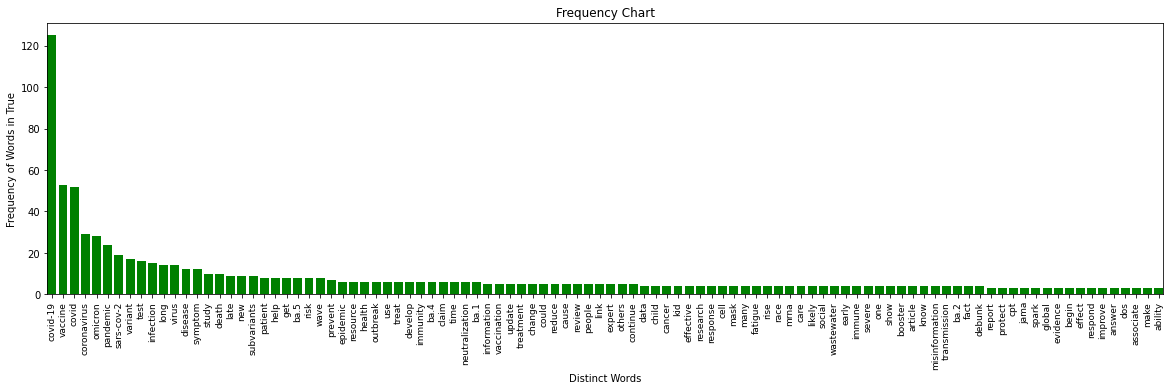

In [27]:
a = BagOfWords(scientific_titles, True)

a.tokenize()
a.to_lower_case()
a.clean_data()
a.remove_stop_words()
a.normalize_words() # todo: improve part of speech performance
a.create_frequency_chart()
a.plot_frequency_chart()

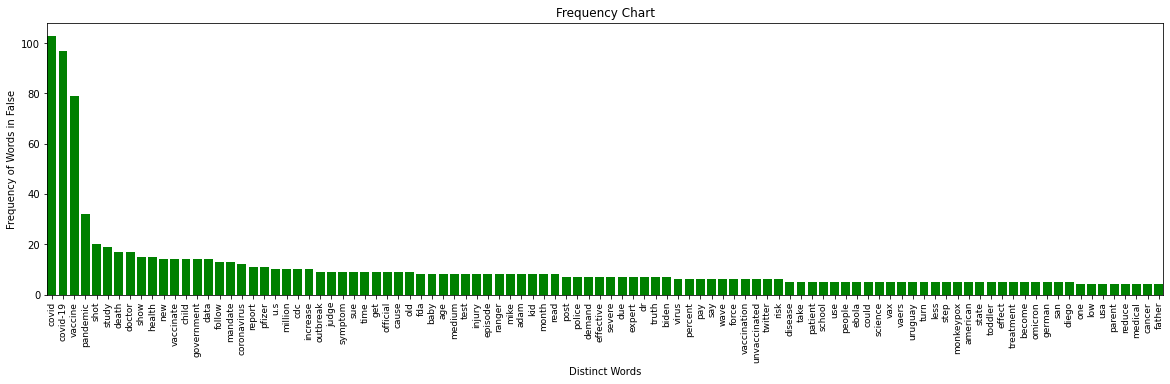

In [28]:
b = BagOfWords(conspiracy_titles, False)

# assuming rn that everything is clean because of testing on 'a', will test later
b.tokenize()
b.to_lower_case()
b.clean_data()
b.remove_stop_words()
b.normalize_words() # todo: improve part of speech performance
b.create_frequency_chart()
b.plot_frequency_chart()

In [29]:
# count the number of times these words occur in each of the articles 




In [30]:
# determine common words between the two sets of words
common_words = dict()
for word, count in a.freqChart.items():
    if word in b.freqChart:
        diff_count = count - b.freqChart[word]
        common_words[word] = diff_count/(count + b.freqChart[word])

# remove all with count 0 
common_words = dict(filter(lambda elem: elem[1] != 0, common_words.items()))

# sorting the dictionary in descending order
common_words = {word: common_words[word] for word in sorted(common_words, key=common_words.get, reverse=True)}

In [31]:
common_words

{'sars-cov-2': 0.8095238095238095,
 'late': 0.8,
 'variant': 0.7894736842105263,
 'resource': 0.7142857142857143,
 'omicron': 0.696969696969697,
 'infection': 0.6666666666666666,
 'others': 0.6666666666666666,
 'continue': 0.6666666666666666,
 'help': 0.6,
 'many': 0.6,
 'rise': 0.6,
 'early': 0.6,
 'article': 0.6,
 'long': 0.5555555555555556,
 'treat': 0.5,
 'spark': 0.5,
 'global': 0.5,
 'make': 0.5,
 'political': 0.5,
 'community': 0.5,
 'provide': 0.5,
 'wrong': 0.5,
 'previous': 0.5,
 'reading': 0.5,
 'information': 0.42857142857142855,
 'change': 0.42857142857142855,
 'link': 0.42857142857142855,
 'coronavirus': 0.4146341463414634,
 'disease': 0.4117647058823529,
 'virus': 0.4,
 'test': 0.3333333333333333,
 'epidemic': 0.3333333333333333,
 'race': 0.3333333333333333,
 'social': 0.3333333333333333,
 'immune': 0.3333333333333333,
 'know': 0.3333333333333333,
 'best': 0.3333333333333333,
 'see': 0.3333333333333333,
 'guidance': 0.3333333333333333,
 'diagnosis': 0.3333333333333333,
 

In [32]:
# plot a graph containing words on either side
x_axis, y_axis = [], []
for word, value in common_words.items():
    x_axis.append(word)
    y_axis.append(value)

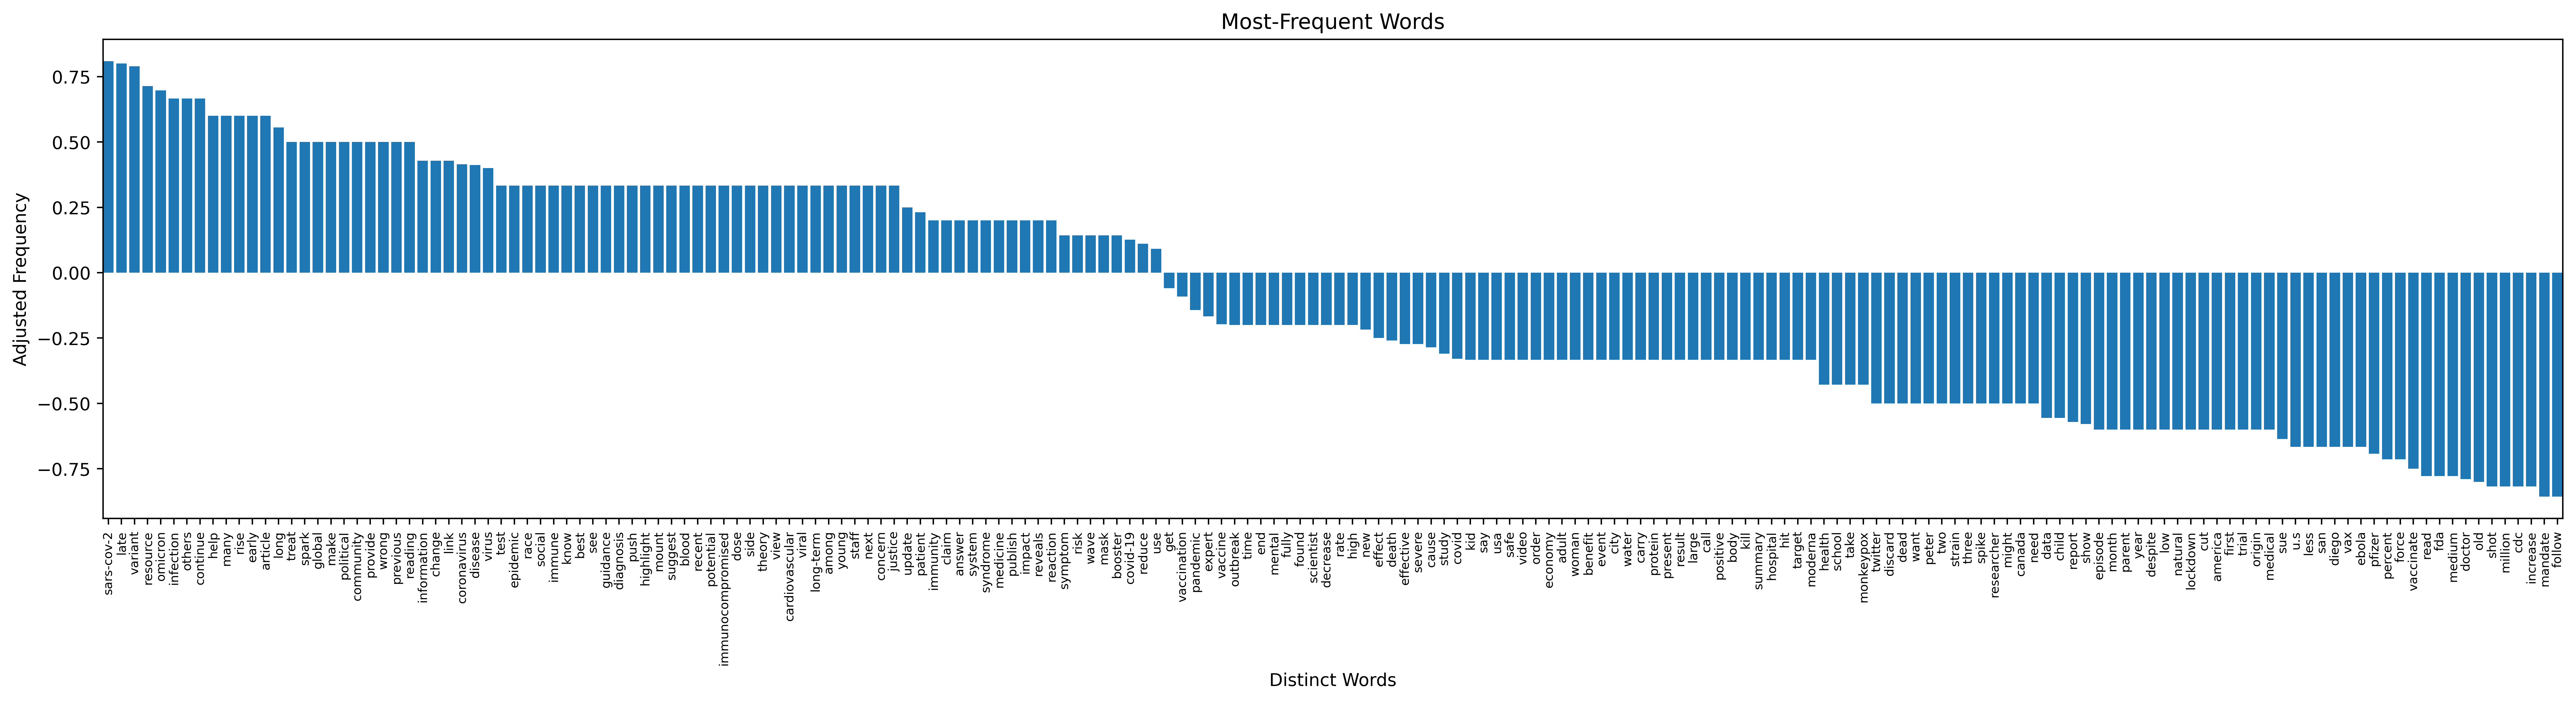

In [33]:
plt.figure(figsize=(25, 5), dpi=500)
plt.margins(x=0, tight=True)
plt.xlabel("Distinct Words")
plt.ylabel("Adjusted Frequency")
plt.title("Most-Frequent Words")
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation = 90)
plt.show()

In [34]:
# extract 20 most common words
sorted_words = []
for key, value in common_words.items():
    sorted_words.append([abs(value), key])
sorted_words.sort(reverse=True)

# take 20 with highest magnitudes  
relevant_words = sorted_words[:40]

# give the sign back
for word in relevant_words:
    word[0] = common_words[word[1]]

In [35]:
relevant_words

[[-0.8571428571428571, 'mandate'],
 [-0.8571428571428571, 'follow'],
 [-0.8181818181818182, 'shot'],
 [-0.8181818181818182, 'million'],
 [-0.8181818181818182, 'increase'],
 [-0.8181818181818182, 'cdc'],
 [0.8095238095238095, 'sars-cov-2'],
 [-0.8, 'old'],
 [0.8, 'late'],
 [0.7894736842105263, 'variant'],
 [-0.7894736842105263, 'doctor'],
 [-0.7777777777777778, 'read'],
 [-0.7777777777777778, 'medium'],
 [-0.7777777777777778, 'fda'],
 [-0.75, 'vaccinate'],
 [0.7142857142857143, 'resource'],
 [-0.7142857142857143, 'percent'],
 [-0.7142857142857143, 'force'],
 [0.696969696969697, 'omicron'],
 [-0.6923076923076923, 'pfizer'],
 [-0.6666666666666666, 'vax'],
 [-0.6666666666666666, 'u.s'],
 [-0.6666666666666666, 'san'],
 [0.6666666666666666, 'others'],
 [-0.6666666666666666, 'less'],
 [0.6666666666666666, 'infection'],
 [-0.6666666666666666, 'ebola'],
 [-0.6666666666666666, 'diego'],
 [0.6666666666666666, 'continue'],
 [-0.6363636363636364, 'sue'],
 [-0.6, 'year'],
 [-0.6, 'trial'],
 [0.6, 'r

In [43]:
positive_cnt = sum(x[0] > 0 for x in relevant_words)

In [44]:
positive_cnt

10